<a href="https://colab.research.google.com/github/SanghaviHarshPankajkumar/CODESOFT/blob/main/codesoft_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction

### import dataset

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 99.1MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/bank-customer-churn-prediction.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done...')

done...


### import necessary libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


## Exploring Dataset

In [5]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
# removing unnecessary features
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [15]:
df.shape

(10000, 11)

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

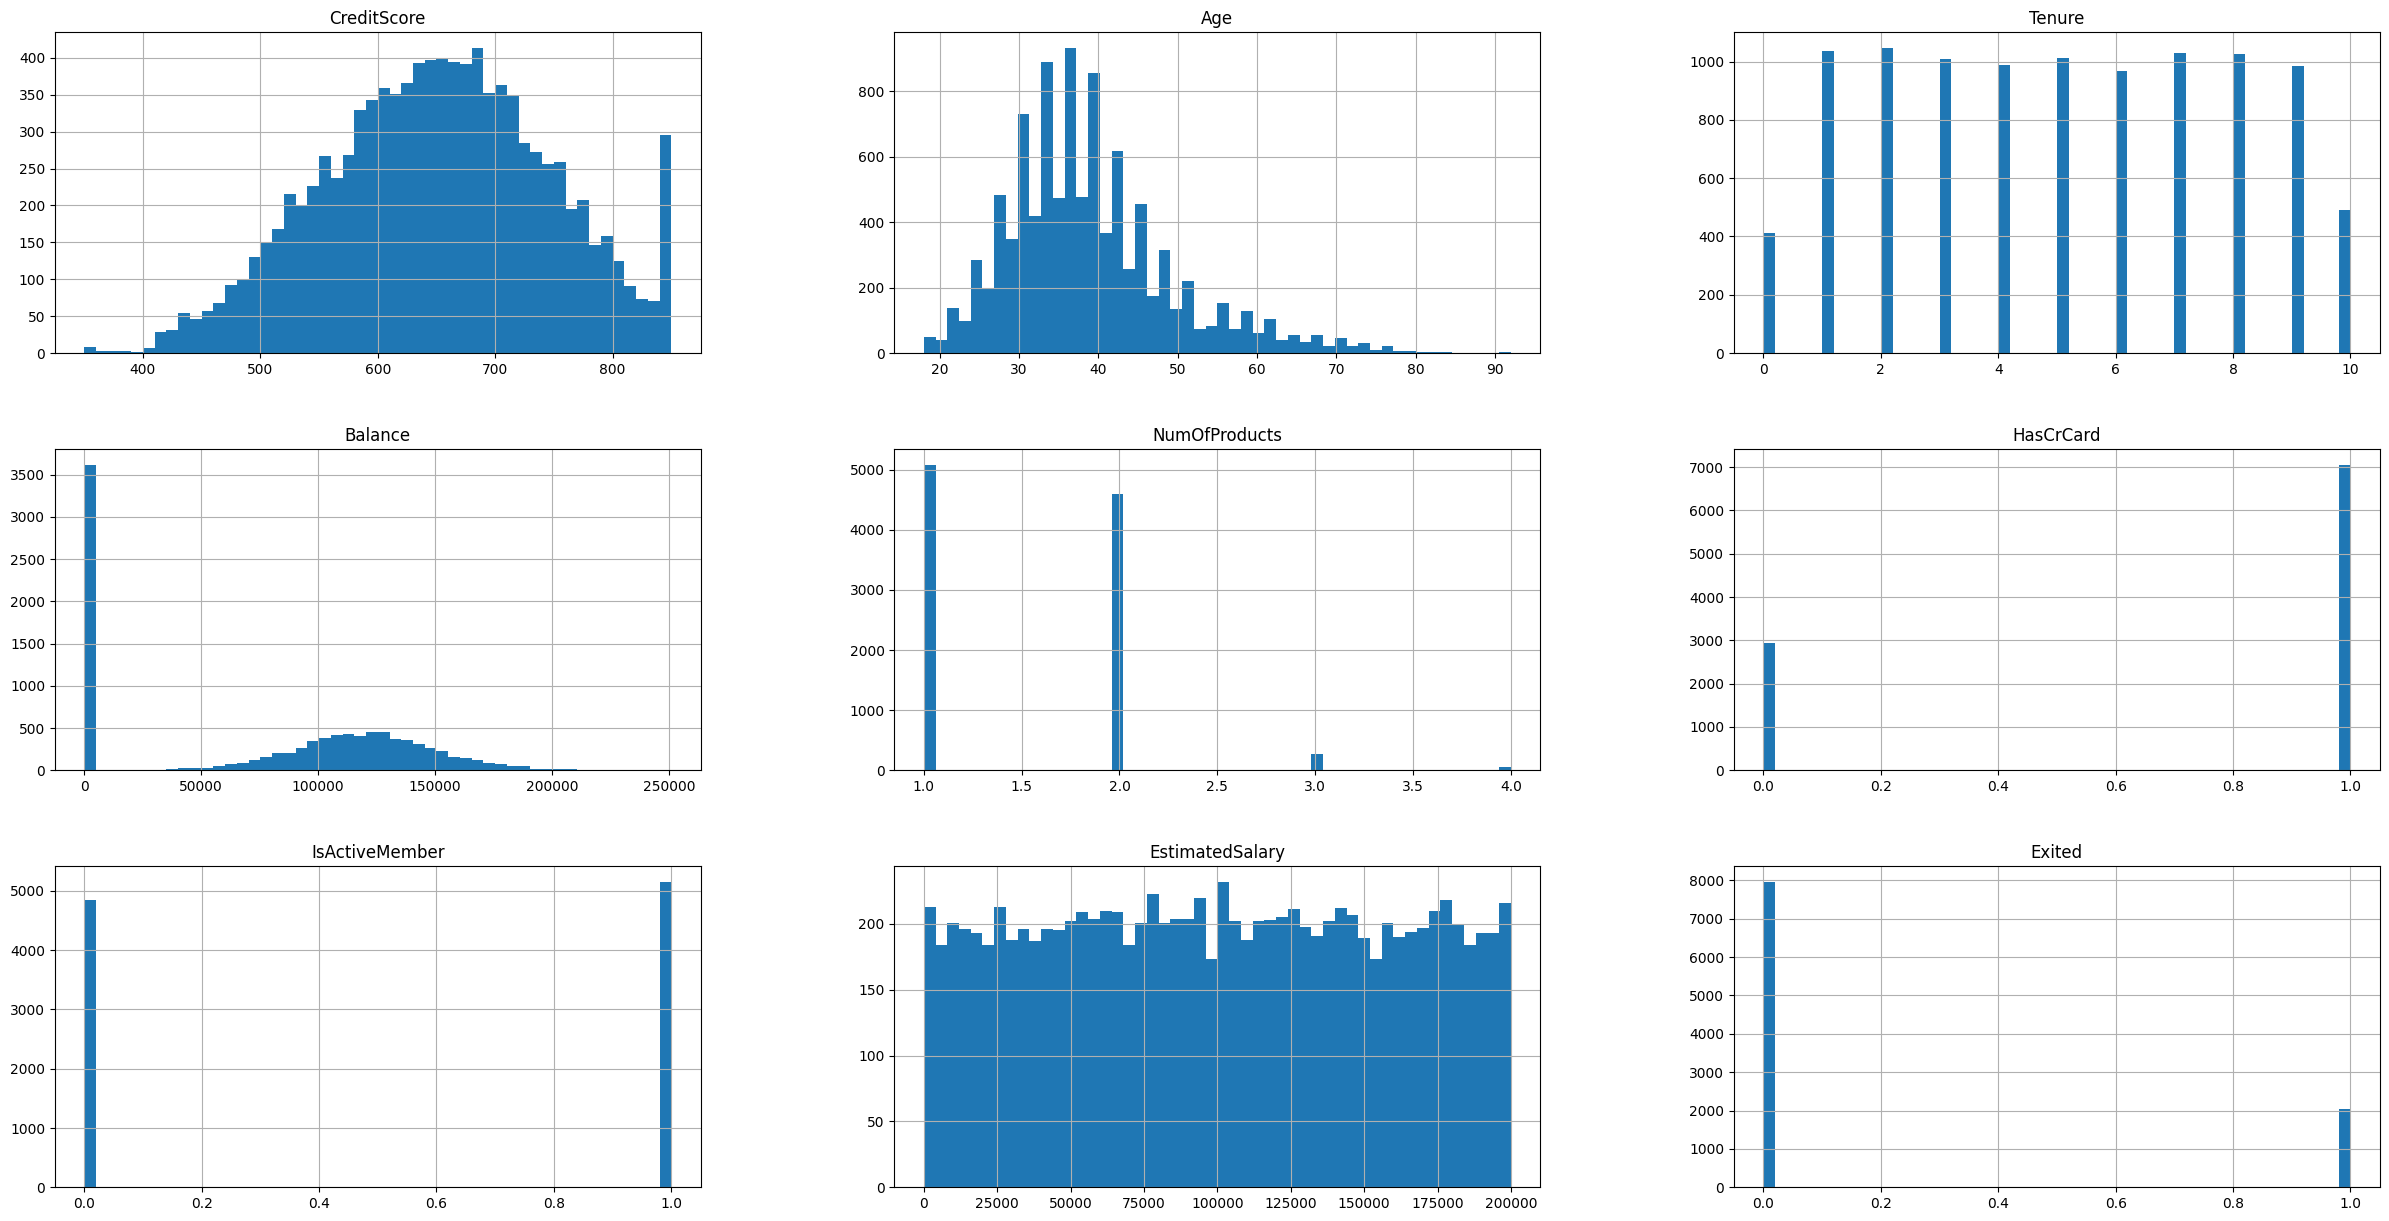

In [14]:
df.hist(bins=50,figsize=(30,15))

Text(0.5, 0.98, 'Countplots')

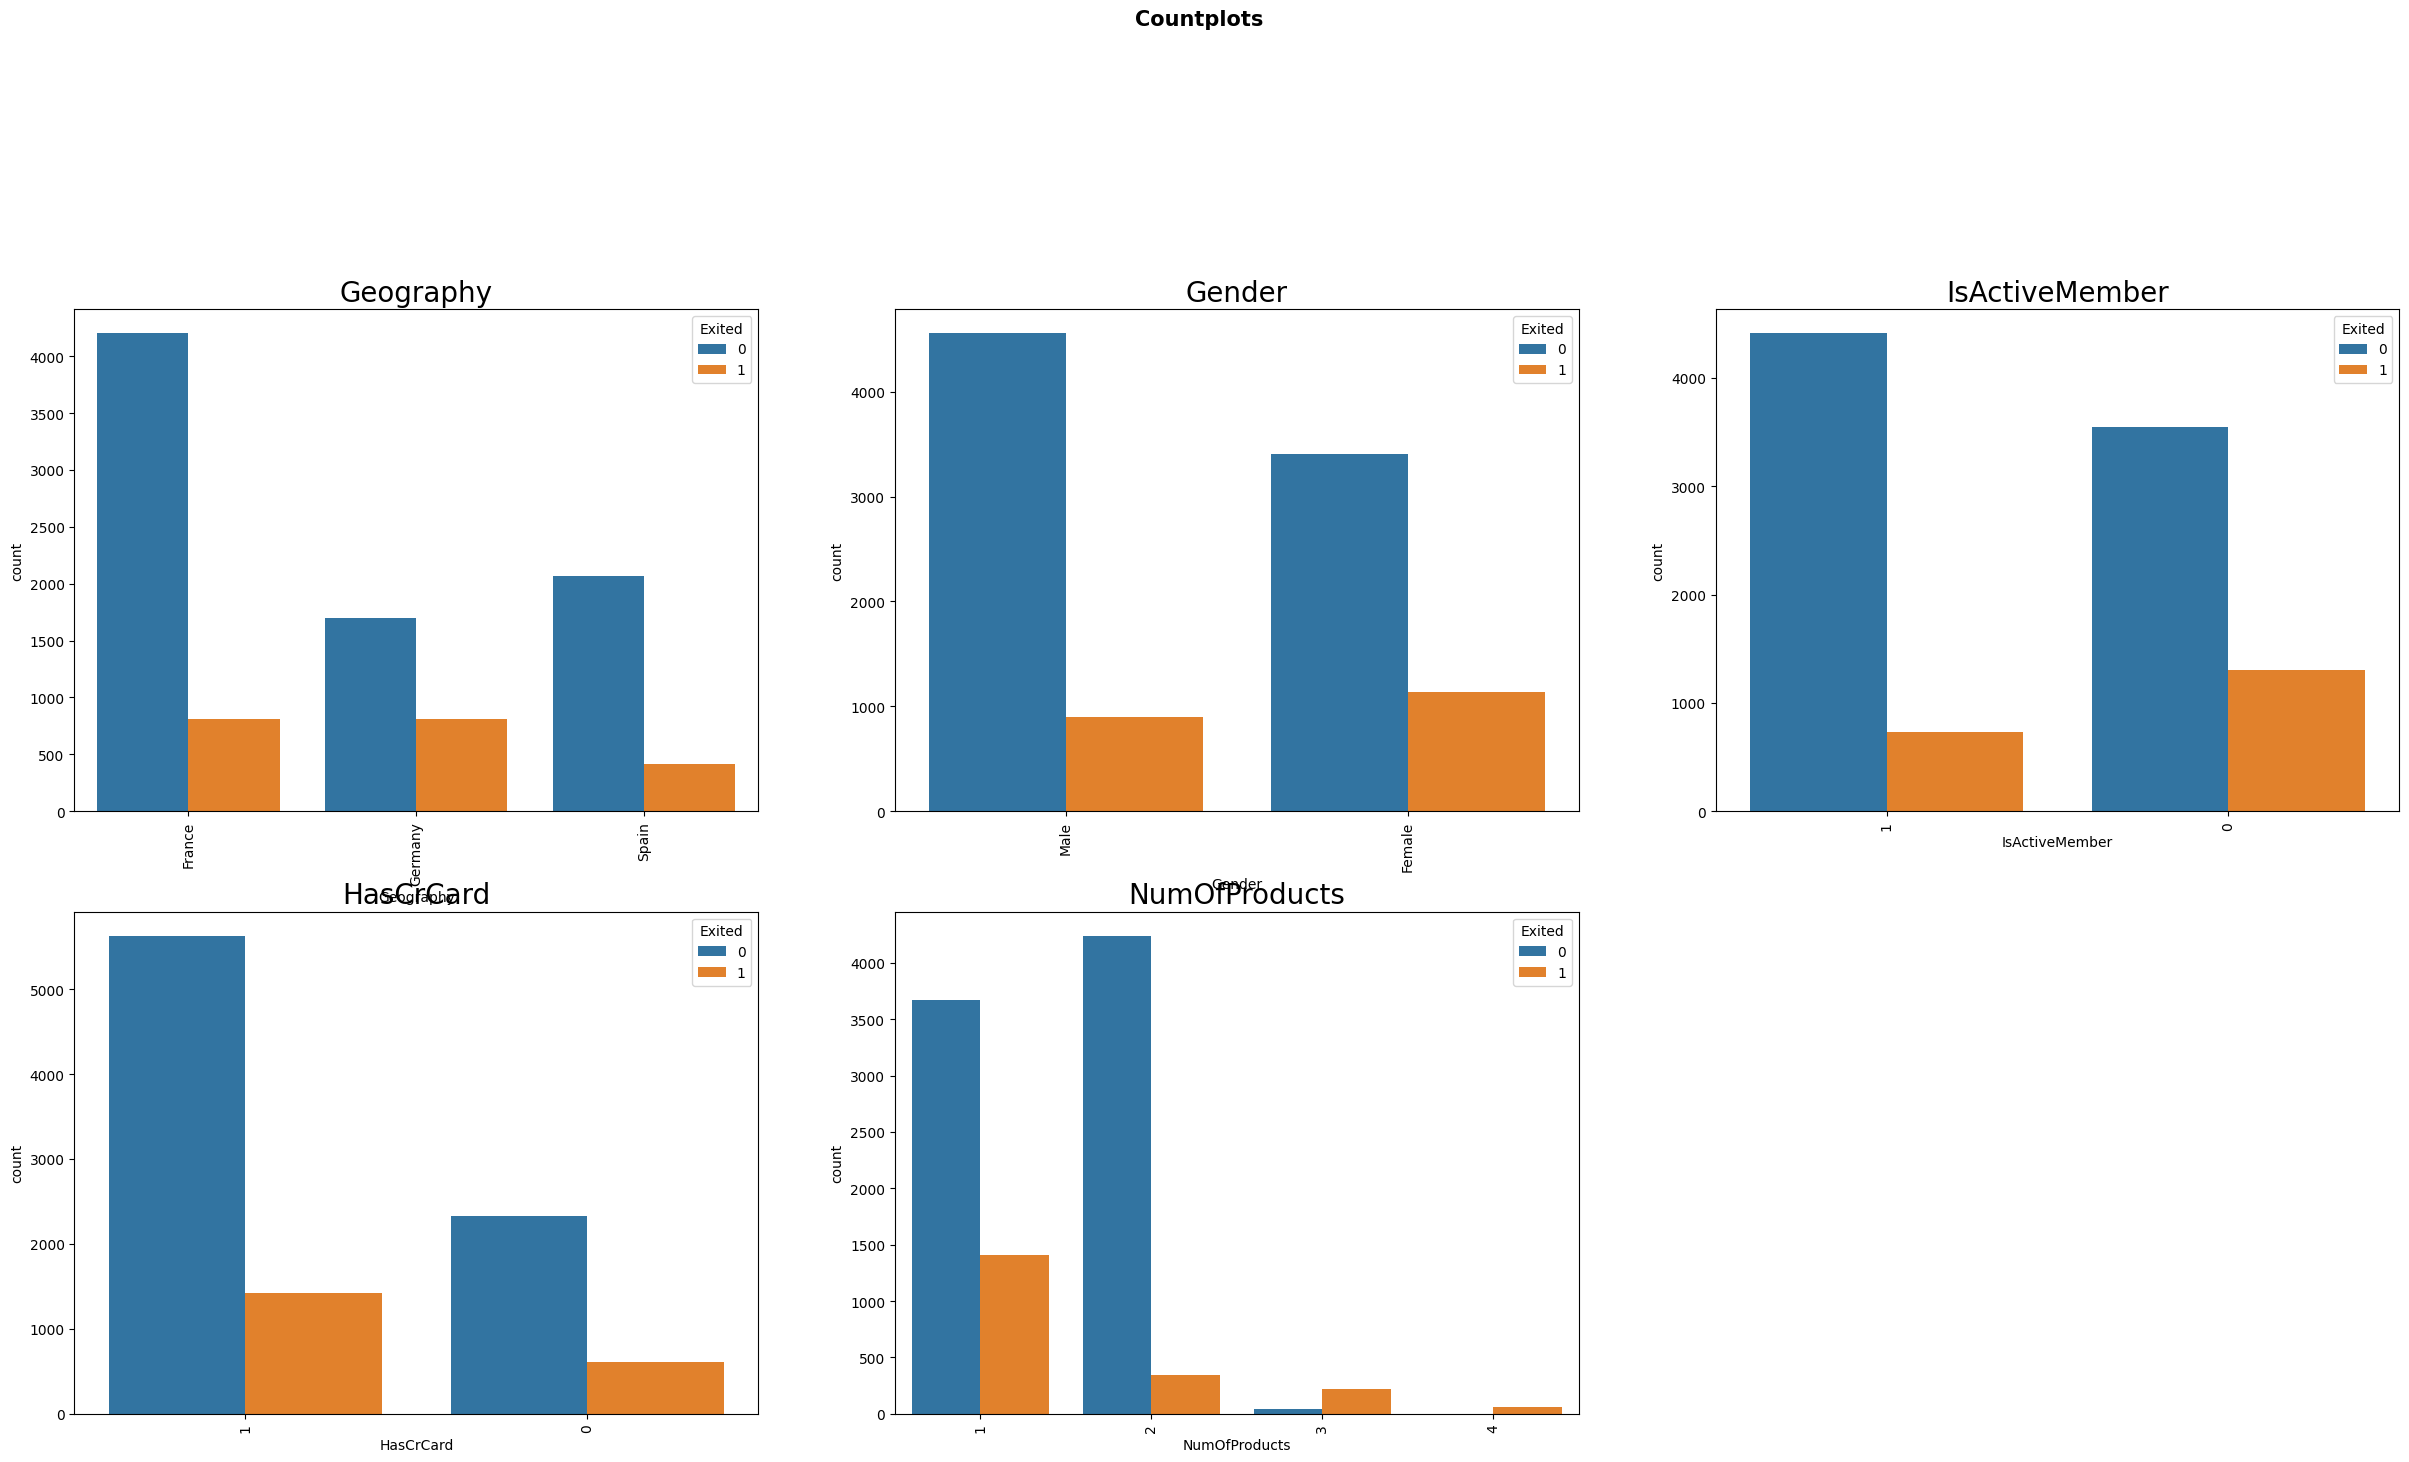

In [22]:
list1 = ['Geography','Gender','IsActiveMember','HasCrCard','NumOfProducts']
plt.figure(figsize=(30,30))

for i,feature in enumerate(list1):
  plt.subplot(4,3,i+1)
  sns.countplot(data=df, x=feature,order = df[feature].value_counts().index, hue=df['Exited'])
  plt.xticks(rotation=90)
  plt.title(feature,fontsize = 20)
plt.suptitle('Countplots',fontsize = 15,fontweight = 'bold')


<ipython-input-20-9bdf2cde1660>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.2f')


<Axes: >

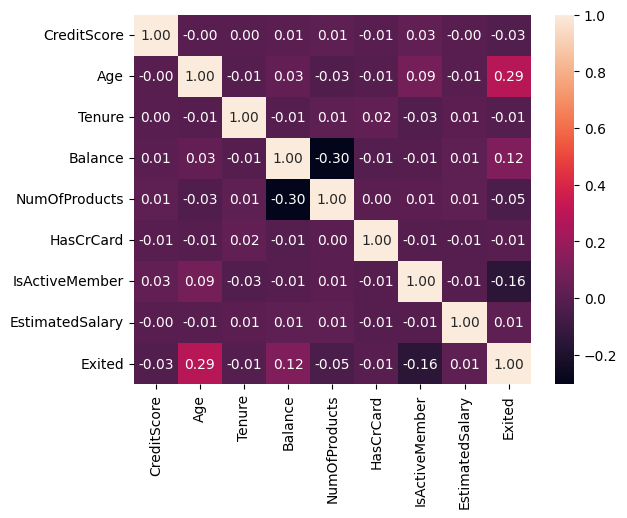

In [20]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')

### preprocessing

In [25]:
#total 10 features
#Age is high positive correlated
#isActiveMember is negative correlated
#no null values

In [28]:
#remove duplicate values
df.drop_duplicates()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [32]:
#label encoding for gender
Le = LabelEncoder()
df['Gender'] = Le.fit_transform(df['Gender'])

In [35]:
#label encoding for geography
Le2 = LabelEncoder()
df['Geography'] = Le2.fit_transform(df['Geography'])

In [36]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [38]:
X = df.drop('Exited',axis=1)
Y = df['Exited']

In [39]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=33)

## Model Creation and Evaluation

In [61]:
lr_grid = {'C': [0.01, 0.1, 1, 10.0]}

In [48]:
grid_search = GridSearchCV(LogisticRegression(), lr_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10.0]}, scoring='accuracy')

In [49]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.1}
0.791625


In [52]:
best_lr_model = LogisticRegression(C=0.1)
best_lr_model.fit(X_train,y_train)

LogisticRegression(C=0.1)

In [62]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    max_features = trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"])
    min_samples_leaf = trial.suggest_int("min_samples_leaf",1,4)
    min_samples_split = trial.suggest_int("min_samples_split",2,20)

    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    return acc

In [ ]:
import optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

In [67]:
study.best_params

{'n_estimators': 90,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 8}

In [68]:
best_rf_model = RandomForestClassifier(n_estimators=90, max_depth=10, max_features='auto', min_samples_leaf=4, min_samples_split=8)
best_rf_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=4,
                       min_samples_split=8, n_estimators=90)

### Evaluate Model

In [69]:
y_pred_lr = best_lr_model.predict(X_test)
y_pred_rf = best_rf_model.predict(X_test)

print("Accuracy Score of both models: ")
print("Logistic Regression:- ",accuracy_score(y_test,y_pred_lr))
print("Random Forest Classifier:- ",accuracy_score(y_test,y_pred_rf))

Accuracy Score of both models: 
Logistic Regression:-  0.789
Random Forest Classifier:-  0.856
